<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/augmentation/TTA_augmentation_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import (
    RepeatedStratifiedKFold,
    cross_val_score)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# **Config**
---

In [74]:
random_seed = 12344

# **Data**
---

In [75]:
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=random_seed
)

**procedimiento normal**

In [76]:
# Cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=random_seed)

scores = []
i = 0
for train, test in cv.split(X, y):
  # Split
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  # Model
  model = LogisticRegression()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  score = accuracy_score(y_test, y_predict)
  scores.append(score)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.826 (0.109)


**Test-Time Augmentation**

In [77]:
def create_test_set(
    row,
    n_cases:int = 3,
    feature_scale:int = 0.2
):
  """crear un conjunto de prueba para una fila de datos
  reales con una etiqueta desconocida"""
  test_set = []
  test_set.append(row)
  for _ in range(n_cases):
    gauss = np.random.normal(loc=0.0, scale=feature_scale, size=(len(row)))
    new_row = row + gauss
    test_set.append(new_row)
  return test_set

In [85]:
def test_time_augmentation(model, X_test, cases=3, noise=0.2):
  """Evalua el modelo"""
  y_predict = []
  for i in range(X_test.shape[0]):
    row = X_test[i]
    test_set = create_test_set(row, cases, noise)
    labels = model.predict(test_set)
    label, _ = mode(labels)
    y_predict.append(label)
  return y_predict

In [79]:
X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=random_seed
)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=random_seed)
scores = []
i = 0
for train, test in cv.split(X, y):
  # Split
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]
  # Model
  model = LogisticRegression()
  model.fit(X_train, y_train)
  y_predict = test_time_augmentation(model, X_test, )
  score = accuracy_score(y_test, y_predict)
  scores.append(score)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Accuracy: 0.828 (0.113)


**Modificando el número de casos**

Accuracy: 0.826 (0.107) 1
Accuracy: 0.824 (0.109) 2
Accuracy: 0.828 (0.102) 3
Accuracy: 0.824 (0.103) 4
Accuracy: 0.830 (0.108) 5
Accuracy: 0.832 (0.103) 6
Accuracy: 0.826 (0.109) 7
Accuracy: 0.828 (0.110) 8
Accuracy: 0.828 (0.108) 9
Accuracy: 0.826 (0.109) 10
Accuracy: 0.824 (0.103) 11
Accuracy: 0.828 (0.110) 12
Accuracy: 0.828 (0.110) 13
Accuracy: 0.830 (0.102) 14
Accuracy: 0.828 (0.110) 15
Accuracy: 0.830 (0.102) 16
Accuracy: 0.830 (0.100) 17
Accuracy: 0.826 (0.109) 18
Accuracy: 0.826 (0.111) 19
Accuracy: 0.828 (0.110) 20


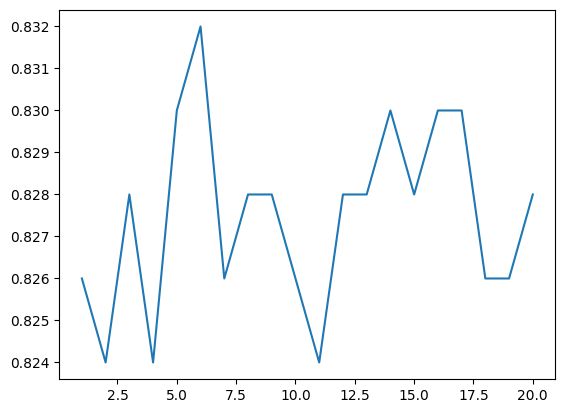

In [84]:
casos = range(1, 21)
results = []
for c in casos:
  X, y = make_classification(
      n_samples=100,
      n_features=20,
      n_informative=15,
      n_redundant=5,
      random_state=random_seed
  )

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=random_seed)
  scores = []
  i = 0
  for train, test in cv.split(X, y):
    # Split
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    # Model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_predict = test_time_augmentation(model, X_test, cases=c)
    score = accuracy_score(y_test, y_predict)
    scores.append(score)
  print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)), c)
  results.append(np.mean(scores))
plt.plot(casos, results)
plt.show()

- Se obtuvo un mejor rendimiento con 5 casos de ejemplos por fila original

**Modificando el ruido**

Accuracy: 0.826 (0.109) 0.01
Accuracy: 0.826 (0.109) 0.02
Accuracy: 0.826 (0.109) 0.03
Accuracy: 0.826 (0.109) 0.04
Accuracy: 0.828 (0.110) 0.05
Accuracy: 0.826 (0.109) 0.060000000000000005
Accuracy: 0.826 (0.109) 0.06999999999999999
Accuracy: 0.826 (0.111) 0.08
Accuracy: 0.828 (0.102) 0.09
Accuracy: 0.830 (0.110) 0.09999999999999999
Accuracy: 0.830 (0.108) 0.11
Accuracy: 0.826 (0.104) 0.12
Accuracy: 0.828 (0.110) 0.13
Accuracy: 0.832 (0.105) 0.14
Accuracy: 0.826 (0.104) 0.15000000000000002
Accuracy: 0.820 (0.111) 0.16
Accuracy: 0.830 (0.104) 0.17
Accuracy: 0.826 (0.104) 0.18000000000000002
Accuracy: 0.826 (0.109) 0.19
Accuracy: 0.830 (0.102) 0.2
Accuracy: 0.826 (0.113) 0.21000000000000002
Accuracy: 0.832 (0.103) 0.22
Accuracy: 0.824 (0.109) 0.23
Accuracy: 0.822 (0.106) 0.24000000000000002
Accuracy: 0.818 (0.113) 0.25
Accuracy: 0.824 (0.109) 0.26
Accuracy: 0.824 (0.101) 0.27
Accuracy: 0.826 (0.109) 0.28
Accuracy: 0.824 (0.112) 0.29000000000000004
Accuracy: 0.824 (0.107) 0.3


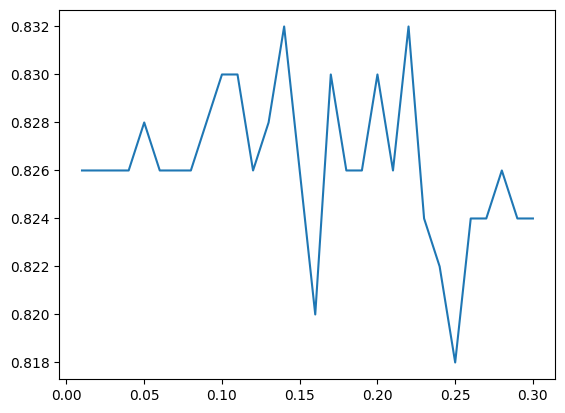

In [89]:
noise = np.arange(0.01, 0.31, 0.01)
results = []
for n in noise:
  X, y = make_classification(
      n_samples=100,
      n_features=20,
      n_informative=15,
      n_redundant=5,
      random_state=random_seed
  )

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=random_seed)
  scores = []
  i = 0
  for train, test in cv.split(X, y):
    # Split
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    # Model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_predict = test_time_augmentation(model, X_test, noise=n)
    score = accuracy_score(y_test, y_predict)
    scores.append(score)
  print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)), n)
  results.append(np.mean(scores))
plt.plot(noise, results)
plt.show()

- Se obtuvo un mejor rendimiento con 0.14 de ruido por fila original

- **Referencia**

https://machinelearningmastery.com/test-time-augmentation-with-scikit-learn/